<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/Fashion_Mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam, RMSprop
from tensorflow.keras.utils      import plot_model, to_categorical 
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score


import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
(X_train_raw, y_train_raw), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_raw.shape, y_train_raw.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train_raw[0]

9

In [ ]:
X_train_raw[0]

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
for idx in range(0, 10) :
    print(idx, class_names[y_train_raw[idx]])

0 Ankle boot
1 T-shirt/top
2 T-shirt/top
3 Dress
4 T-shirt/top
5 Pullover
6 Sneaker
7 Pullover
8 Sandal
9 Sandal


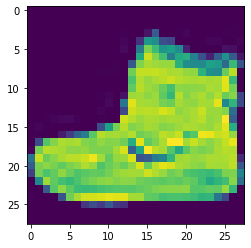

In [ ]:
plt.imshow(X_train_raw[0])
plt.show()

In [ ]:
num_sample = 4
random_idx = np.random.randint(60000, size=num_sample)
random_idx

array([47630, 46538, 58641, 37749])

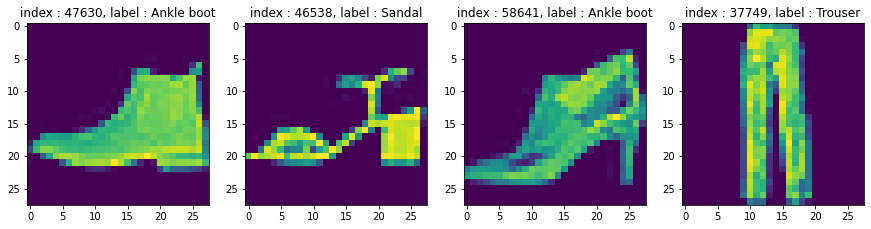

In [ ]:
plt.figure(figsize=(15,15))

for i, idx in enumerate(random_idx) :
    #print(i, idx)
    img   = X_train_raw[idx, :]
    label = y_train_raw[idx]

    plt.subplot(1, len(random_idx), i+1)
    plt.imshow(img)
    plt.title('index : {}, label : {}'.format(idx, class_names[label]))

In [ ]:
X_train = X_train_raw.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [ ]:
X_train.shape, X_test.shape, y_train_raw.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
X_train , _ , y_train , _ = train_test_split(X_train, y_train_raw, test_size = .2, random_state = 100)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48000, 784), (48000,), (10000, 784), (10000,))

In [ ]:
def get_model():
    model = Sequential()
    model.add(Dense(50, activation='sigmoid', input_shape=(784,)))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

In [ ]:
model = get_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

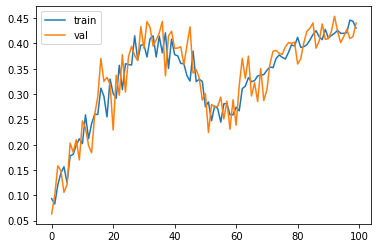

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('test accuracy : {} '.format(result[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.3775 - accuracy: 0.4402
test accuracy : 0.44020000100135803 


### Resnet
- optimizer = Adam
- optimizer = RMSprop
- loss = sparse_categorical_crossentropy 

- Adam

In [34]:
def improve_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,) ,kernel_initializer='he_normal'))

    model.add(Dense(50, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [35]:
model = improve_get_adam_model()

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

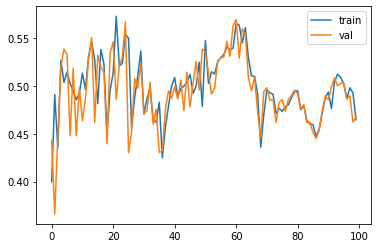

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [40]:
result = model.evaluate(X_test, y_test)
print('resnet adam test accuracy', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.2171 - accuracy: 0.4719
resnet adam test accuracy 0.47189998626708984


- RMSprop

In [41]:
def improve_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,) ,kernel_initializer='he_normal'))

    model.add(Dense(50, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [48]:
model = improve_get_rmsprop_model()

optimizer = RMSprop(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

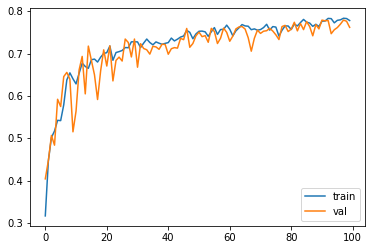

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [54]:
result = model.evaluate(X_test, y_test)
print('resnet rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.7541
resnet rmsprop test accuracy :  0.7541000247001648


### Relu

- Adam

In [55]:
def improve_activation_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, activation='relu',input_shape=(784,)))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(50 ,activation='relu'))
    model.add(Dense(50 ,activation='relu'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [56]:
model = improve_activation_get_adam_model()

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

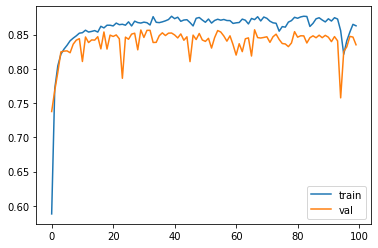

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [59]:
result = model.evaluate(X_test, y_test)
print('relu adam test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.8270
relu adam test accuracy :  0.8270000219345093


- RMSprop

In [60]:
def improve_activation_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, activation='relu',input_shape=(784,)))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(50 ,activation='relu'))
    model.add(Dense(50 ,activation='relu'))

    model.add(Dense(10 ,activation='softmax'))

    return model

In [61]:
model = improve_activation_get_rmsprop_model()

optimizer = RMSprop(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

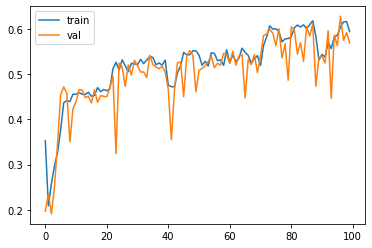

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [64]:
result = model.evaluate(X_test, y_test)
print('relu rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.1630 - accuracy: 0.5747
relu rmsprop test accuracy :  0.5746999979019165


### 배치 정규화

- Adam

In [65]:
def normalization_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [66]:
model = normalization_get_adam_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 50)               

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

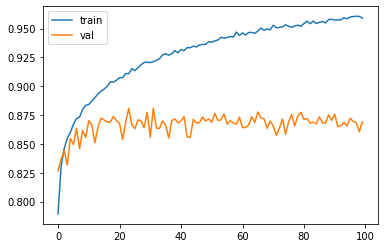

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [69]:
result = model.evaluate(X_test, y_test)
print('normalization adam test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.6022 - accuracy: 0.8655
normalization adam test accuracy :  0.8654999732971191


- Rmsprop

In [71]:
def normalization_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [72]:
model = normalization_get_rmsprop_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)                200       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 50)               

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

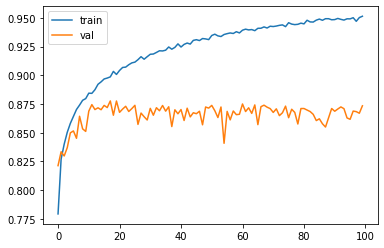

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [75]:
result = model.evaluate(X_test, y_test)
print('normalization rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.6727 - accuracy: 0.8730
normalization rmsprop test accuracy :  0.8730000257492065


### Dropout

- Adam

In [76]:
def dropout_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [77]:
model = dropout_get_adam_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_9 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 50)              

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

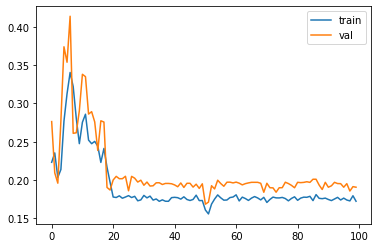

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [80]:
result = model.evaluate(X_test, y_test)
print('dropout adam test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.9111 - accuracy: 0.1954
dropout adam test accuracy :  0.19539999961853027


- Rmsprop

In [100]:
def dropout_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [101]:
model = dropout_get_rmsprop_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_28 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_29 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 50)              

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

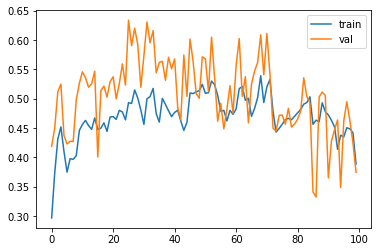

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [104]:
result = model.evaluate(X_test, y_test)
print('dropout rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.6056 - accuracy: 0.3733
dropout rmsprop test accuracy :  0.3732999861240387


### 배치정규화 + Dropout

- Adam

In [95]:
def dropout_batch_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [96]:
model = dropout_batch_get_adam_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_12 (Batc (None, 50)                200       
_________________________________________________________________
activation_24 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_13 (Batc (None, 50)                200       
_________________________________________________________________
activation_25 (Activation)   (None, 50)              

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

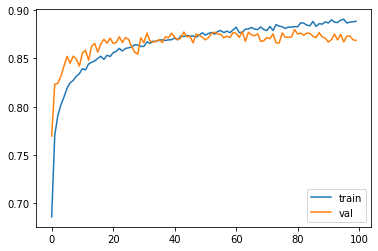

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [99]:
result = model.evaluate(X_test, y_test)
print('dropout batch adam test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.8618
dropout batch adam test accuracy :  0.8618000149726868


- Rmsprop

In [105]:
def dropout_batch_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [106]:
model = dropout_batch_get_rmsprop_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_16 (Batc (None, 50)                200       
_________________________________________________________________
activation_32 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_17 (Batc (None, 50)                200       
_________________________________________________________________
activation_33 (Activation)   (None, 50)              

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

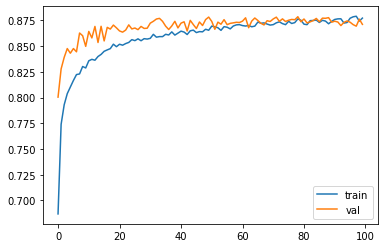

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [109]:
result = model.evaluate(X_test, y_test)
print('dropout batch rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8623
dropout batch rmsprop test accuracy :  0.8622999787330627


### Early stopping

- Adam

In [110]:
def dropout_early_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [111]:
model = dropout_early_get_adam_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_36 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_37 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 50)              

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

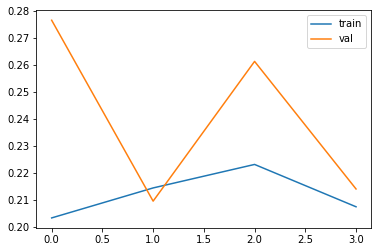

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [114]:
result = model.evaluate(X_test, y_test)
print('dropout early adam test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7440 - accuracy: 0.2172
dropout early adam test accuracy :  0.21719999611377716


- Rmsprop

In [116]:
def dropout_early_get_rmsprop_model() :

    model = Sequential()
    model.add(Dense(50, input_shape=(784,)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [117]:
model = dropout_early_get_rmsprop_model()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_40 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_41 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 50)              

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

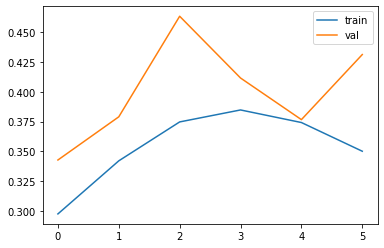

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')
plt.show()

In [120]:
result = model.evaluate(X_test, y_test)
print('dropout early rmsprop test accuracy : ', result[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.2624 - accuracy: 0.4282
dropout early rmsprop test accuracy :  0.42820000648498535


### Ensemble

In [131]:
def improve_get_adam_model() :

    model = Sequential()
    model.add(Dense(50, activation='sigmoid',input_shape=(784,) ,kernel_initializer='he_normal'))

    model.add(Dense(50, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(50 ,activation='sigmoid',kernel_initializer='he_normal'))

    model.add(Dense(10 ,activation='softmax'))

    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

    return model

In [132]:
model = improve_get_adam_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_121 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_122 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_123 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_124 (Dense)            (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [133]:
model01 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)
model02 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)
model03 = KerasClassifier(build_fn=get_model, epochs=100, verbose=0)

model01._estimator_type = 'classifier'
model02._estimator_type = 'classifier'
model03._estimator_type = 'classifier'

In [ ]:
ensemble_model = VotingClassifier(estimators=[('model01', model01), ('model02', model02), ('model03', model03)], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

print('improve get adam esemble test accuracy : ', accuracy_score(y_pred, y_test))